## A simple Armijo

In [1]:
# import libraries
import numpy as np

# Example objective function
def f(x):
    return x**2

# Gradient of the objective function 
def grad_f(x):
    return 2 *x

# Armijo rule for step size selection
# computes the parameter alpha for the step size selection using the Armijo rule
def armijo_rule(x_k, f, grad_f, alpha, d_k, sigma=0.1, mu=0.5):
    i = 0
    while True:
        new_x = x_k + alpha * d_k
        print(f'Itration {i} =>')
        print(f'x_k = {x_k}     f(x_k)= {f(x_k)}')
        print(f'alpha = {alpha}')
        print(f'x_k+1 = {new_x}     f(x_k+1)= {f(new_x)}')
        print('=========================')
        if f(new_x) <= f(x_k) + alpha * sigma * np.dot(grad_f(x_k), d_k):
            return alpha
        #reduce the step size 
        alpha *= mu
        i += 1 

# Example starting point 
x_k = 10
# Example search direction 
d_k = -grad_f(x_k)
# Initial step size   
alpha = 1  
step_size = armijo_rule(x_k, f, grad_f, alpha, d_k)
print("Optimal step size:", step_size)        

Itration 0 =>
x_k = 10     f(x_k)= 100
alpha = 1
x_k+1 = -10     f(x_k+1)= 100
Itration 1 =>
x_k = 10     f(x_k)= 100
alpha = 0.5
x_k+1 = 0.0     f(x_k+1)= 0.0
Optimal step size: 0.5


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(x, 0)

def f(A, x, b):
    residual = relu(np.dot(A, x) - b)
    return np.linalg.norm(residual)**2

def grad_f(A, x, b):
    residual = relu(np.dot(A, x) - b)
    return 2 * np.dot(np.transpose(A), residual)

def armijo_rule(A, b, x, d, grad_f, sigma=0.1, mu=0.7):
    i =0
    alpha = 1.0
    while f(A, x + alpha * d, b) > f(A, x, b) + sigma * alpha * np.dot(grad_f(A, x, b).flatten(), d.flatten()):
        alpha *= mu
        i += 1
    return alpha

Optimal step size: 5.4116956037952e-06


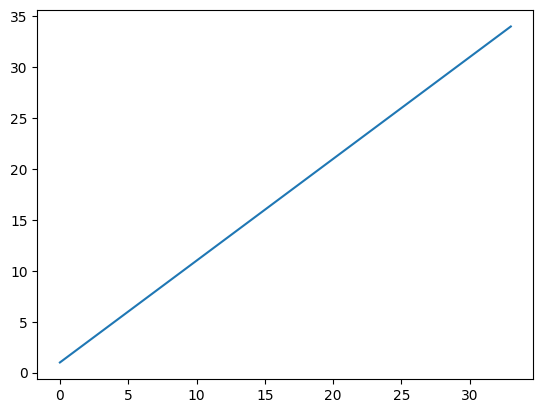

In [9]:
m = int(input("please enter n")) 
n = int(input("please enter m"))

# Generate random A, x, and b
np.random.seed(42)
A = 10 * (np.random.randn(m, n) - np.random.randn(m, n))
x_true = np.random.randn(n, 1) - np.random.randn(n, 1)
b = np.dot(A, x_true) + 0.01 * np.eye(m).dot(np.maximum(np.dot(A, x_true) - np.random.randn(m, 1), 0))

# Initial guess
x0 = np.random.randn(n, 1)

d = -grad_f(A, x0, b)
step_size= armijo_rule(A, b, x0, d, grad_f)
print("Optimal step size:", step_size)